In [1]:
# I cannot pip install on the Hub
import sys
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath('/home/jovyan/work/hetdex/packs/private-het-data/src'))

import het_cov

In [2]:
cov_file = '/home/jovyan/work/hetdex/data/cov_calfib_ffsky.h5'
with h5py.File(cov_file, 'r') as f:
    shotids = f['shotid'][:]
    cov = f['cov_calfib_ffsky'][:]
print(cov.shape, shotids.shape)

(376, 1036, 1036) (376,)


In [3]:
with h5py.File('/home/jovyan/work/hetdex/data/wave.h5', 'r') as f:
    wave = f['wave'][:]

In [4]:
def get_corr(cov_matrices):

    corr_matrices = np.zeros_like(cov_matrices)
    for i in range(corr_matrices.shape[0]):
        # Compute standard deviations of each pixel
        std_devs = np.sqrt(np.diag(cov_matrices[i]))
    
        # Avoid division by zero
        std_devs[std_devs == 0] = 1e-10
    
        # Compute correlation matrix
        corr_matrices[i] = cov_matrices[i] / np.outer(std_devs, std_devs)
        
    return corr_matrices
corr = get_corr(cov)

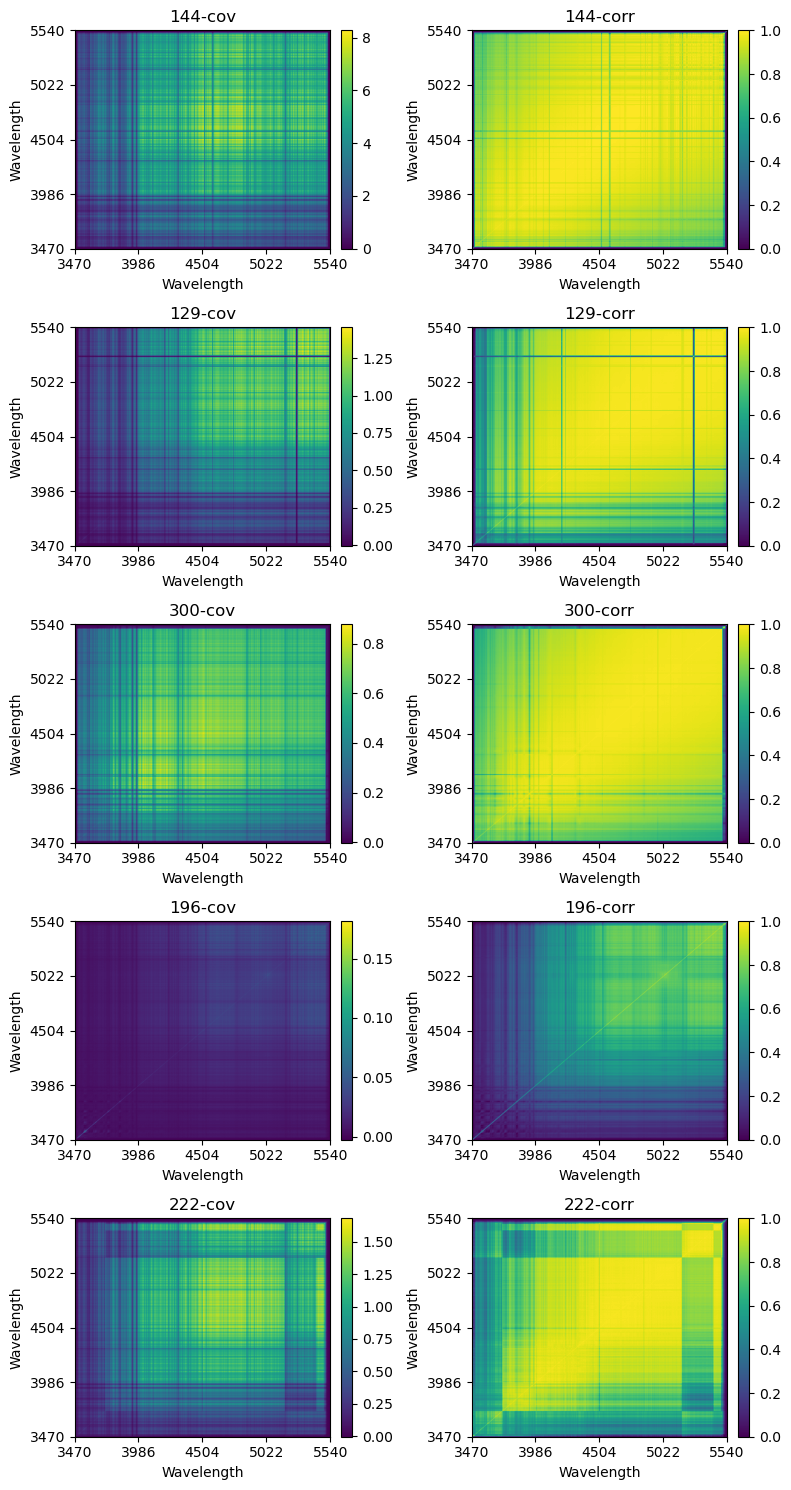

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

fig, ax = plt.subplots(5, 2, figsize=(8, 15))
ind = np.random.randint(0, shotids.size, 5)

N = wave.shape[0]  # assuming square covariance matrices of shape (N, N)

# Pick ~5 log-spaced ticks across the full wave range
num_ticks = 5
tick_indices = np.linspace(0, N - 1, num_ticks, dtype=int)
tick_positions = [wave[i] for i in tick_indices]
tick_labels = [f"{wave[i]:.0f}" for i in tick_indices]

# Loop over each shot
for i, shot in enumerate(ind):
    ax[i, 0].set_title(f'{shot}-cov')
    ax[i, 1].set_title(f'{shot}-corr')

    # Show images with wavelength-scaled axes using 'extent'
    im0 = ax[i, 0].imshow(cov[shot, :, :], origin='lower', cmap='viridis',
                          aspect='auto', extent=[wave[0], wave[-1], wave[0], wave[-1]])
    im1 = ax[i, 1].imshow(corr[shot, :, :], origin='lower', cmap='viridis', vmin=0, vmax=1,
                          aspect='auto', extent=[wave[0], wave[-1], wave[0], wave[-1]])

    # Set wavelength ticks and labels
    for a in [ax[i, 0], ax[i, 1]]:
        a.set_xticks(tick_positions)
        a.set_xticklabels(tick_labels)
        a.set_yticks(tick_positions)
        a.set_yticklabels(tick_labels)
        a.set_xlabel("Wavelength")
        a.set_ylabel("Wavelength")

    fig.colorbar(im0, ax=ax[i, 0], fraction=0.046, pad=0.04)
    fig.colorbar(im1, ax=ax[i, 1], fraction=0.046, pad=0.04)

fig.tight_layout()